<a href="https://colab.research.google.com/github/ebokoh/loan_default_prediction/blob/main/loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV

# Import machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,roc_curve, roc_auc_score,accuracy_score

%matplotlib inline
tf.__version__

'2.9.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tf.test.gpu_device_name()

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/myData/loan_default/training_data.csv")
#df_test = pd.read_csv("/content/drive/MyDrive/myData/loan_default/testing_data.csv")

In [ ]:
df_train.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,...,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,...,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,...,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,...,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,...,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


In [ ]:
df_train.shape

(105000, 26)

In [ ]:
df_train.columns = [x.strip() for x in df_train.columns]


In [ ]:
df_train = df_train.rename(columns = {'Guaranteed_Approved _Loan':'Guaranteed_Approved_Loan'})

In [ ]:
df_train_orig = df_train.copy()

In [ ]:
df_train['Revolving_Credit_Line'].fillna(df_train['Revolving_Credit_Line'].mode()[0], inplace=True)
df_train['Low_Documentation_Loan'].fillna(df_train['Low_Documentation_Loan'].mode()[0], inplace=True)
df_train['Business'].fillna(df_train['Business'].mode()[0], inplace=True)

In [ ]:
df_train.isnull().sum().sort_values(ascending=False)

Date_Of_Disbursement        235
Borrower_Name                 3
ID                            0
Gross_Amount_Balance          0
Revolving_Credit_Line         0
Name_Of_Bank                  0
Code_Franchise                0
Primary_Loan_Digit            0
Commitment_Date               0
Loan_Term                     0
Gross_Amount_Disbursed        0
Loan_Approved_Gross           0
Classification_Code           0
Count_Employees               0
Borrower_State                0
Borrower_City                 0
ChargedOff_Amount             0
State_Of_Bank                 0
Demography                    0
Low_Documentation_Loan        0
Guaranteed_Approved_Loan      0
Year_Of_Commitment            0
Jobs_Created                  0
Jobs_Reatained                0
Business                      0
Default                       0
dtype: int64

In [ ]:
df_train = df_train.drop('Date_Of_Disbursement',axis=1)

df_train = df_train.drop('Borrower_Name',axis=1)

In [ ]:
df_train.isnull().sum().sort_values(ascending=False)

ID                          0
Business                    0
Revolving_Credit_Line       0
Name_Of_Bank                0
Code_Franchise              0
Primary_Loan_Digit          0
Commitment_Date             0
Loan_Term                   0
Gross_Amount_Disbursed      0
Loan_Approved_Gross         0
Classification_Code         0
Count_Employees             0
Gross_Amount_Balance        0
Borrower_State              0
Borrower_City               0
ChargedOff_Amount           0
State_Of_Bank               0
Demography                  0
Low_Documentation_Loan      0
Guaranteed_Approved_Loan    0
Year_Of_Commitment          0
Jobs_Created                0
Jobs_Reatained              0
Default                     0
dtype: int64

In [ ]:
df_train.describe(include='all')

,ID,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
count,105000.00000,105000,105000.000000,105000.000000,105000,105000,105000,105000,105000,105000,...,105000.000000,105000,105000,105000.000000,105000,1.050000e+05,105000.000000,105000,105000,105000.000000
unique,NaN,3,NaN,NaN,91,10138,7,3,34,23059,...,NaN,6218,23443,NaN,7719,NaN,NaN,143,11,NaN
top,NaN,Existing,NaN,NaN,2007,Rs.2032000.0,No,Urban,TR,Rs.0.0,...,NaN,Rs.4064000.0,Rs.4064000.0,NaN,30-Jan-04,NaN,NaN,ICICI Bank Ltd.,No,NaN
freq,NaN,75106,NaN,NaN,6769,6464,92502,57598,15552,75515,...,NaN,8708,5342,NaN,128,NaN,NaN,11215,48613,NaN
mean,52499.50000,NaN,12.688648,10.379248,NaN,NaN,NaN,NaN,NaN,NaN,...,405918.304276,NaN,NaN,156.438362,NaN,4.661622e+09,2707.201638,NaN,NaN,0.277181
std,30311.03347,NaN,270.544185,270.340849,NaN,NaN,NaN,NaN,NaN,NaN,...,260335.963766,NaN,NaN,116.412721,NaN,2.546599e+09,12660.609090,NaN,NaN,0.447609
min,0.00000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,0.000000,NaN,1.000034e+09,0.000000,NaN,NaN,0.000000
25%,26249.75000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,236115.000000,NaN,NaN,90.000000,NaN,2.478163e+09,0.000000,NaN,NaN,0.000000
50%,52499.50000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,447110.000000,NaN,NaN,126.000000,NaN,4.119824e+09,1.000000,NaN,NaN,0.000000
75%,78749.25000,NaN,4.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,561740.000000,NaN,NaN,180.000000,NaN,6.760484e+09,1.000000,NaN,NaN,1.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        105000 non-null  int64 
 1   Business                  105000 non-null  object
 2   Jobs_Reatained            105000 non-null  int64 
 3   Jobs_Created              105000 non-null  int64 
 4   Year_Of_Commitment        105000 non-null  object
 5   Guaranteed_Approved_Loan  105000 non-null  object
 6   Low_Documentation_Loan    105000 non-null  object
 7   Demography                105000 non-null  object
 8   State_Of_Bank             105000 non-null  object
 9   ChargedOff_Amount         105000 non-null  object
 10  Borrower_City             105000 non-null  object
 11  Borrower_State            105000 non-null  object
 12  Gross_Amount_Balance      105000 non-null  object
 13  Count_Employees           105000 non-null  int64 
 14  Clas

In [ ]:
df_train['Loan_Approved_Gross'].apply(type).value_counts()

<class 'str'>    105000
Name: Loan_Approved_Gross, dtype: int64

In [ ]:
df_train['Loan_Approved_Gross'] = df_train['Loan_Approved_Gross'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_train['Gross_Amount_Disbursed'] = df_train['Gross_Amount_Disbursed'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_train['Gross_Amount_Balance'] = df_train['Gross_Amount_Balance'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_train['ChargedOff_Amount'] = df_train['ChargedOff_Amount'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_train['Guaranteed_Approved_Loan'] = df_train['Guaranteed_Approved_Loan'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        105000 non-null  int64  
 1   Business                  105000 non-null  object 
 2   Jobs_Reatained            105000 non-null  int64  
 3   Jobs_Created              105000 non-null  int64  
 4   Year_Of_Commitment        105000 non-null  object 
 5   Guaranteed_Approved_Loan  105000 non-null  float64
 6   Low_Documentation_Loan    105000 non-null  object 
 7   Demography                105000 non-null  object 
 8   State_Of_Bank             105000 non-null  object 
 9   ChargedOff_Amount         105000 non-null  float64
 10  Borrower_City             105000 non-null  object 
 11  Borrower_State            105000 non-null  object 
 12  Gross_Amount_Balance      105000 non-null  float64
 13  Count_Employees           105000 non-null  i

In [ ]:
df_train = df_train.drop('ID',axis=1)

In [ ]:
df_train['Revolving_Credit_Line'].value_counts()

#df_train = df_train.loc[df_train['Revolving_Credit_Line'].isin(['Yes','No'])]

#df_train.isnull().sum().sort_values(ascending=False)

No     48613
0      29612
Yes    24643
T       2120
R          4
`          2
1          2
2          1
4          1
.          1
C          1
Name: Revolving_Credit_Line, dtype: int64

In [ ]:
df_train['Revolving_Credit_Line'] = df_train['Revolving_Credit_Line'].replace('T', 'No')
df_train['Revolving_Credit_Line'] = df_train['Revolving_Credit_Line'].replace('R', 'No')
df_train['Revolving_Credit_Line'] = df_train['Revolving_Credit_Line'].replace('`', 'No')
df_train['Revolving_Credit_Line'] = df_train['Revolving_Credit_Line'].replace('1', 'No')
df_train['Revolving_Credit_Line'] = df_train['Revolving_Credit_Line'].replace('2', 'No')
df_train['Revolving_Credit_Line'] = df_train['Revolving_Credit_Line'].replace('4', 'No')
df_train['Revolving_Credit_Line'] = df_train['Revolving_Credit_Line'].replace('.', 'No')
df_train['Revolving_Credit_Line'] = df_train['Revolving_Credit_Line'].replace('C', 'No')

In [ ]:
df_train['Revolving_Credit_Line'] = df_train['Revolving_Credit_Line'].replace('0', 'No')

In [ ]:
df_train['Revolving_Credit_Line'].value_counts()

No     80357
Yes    24643
Name: Revolving_Credit_Line, dtype: int64

In [ ]:
df_train = df_train.drop(['Primary_Loan_Digit'], axis=1)

df_train.shape

(105000, 22)

In [ ]:
df_train['Business'].value_counts()

Existing    75106
New         29789
0             105
Name: Business, dtype: int64

In [ ]:
#df_train = df_train.loc[df_train['Business'].isin(['Existing','New'])]

df_train.shape

(105000, 22)

In [ ]:
df_train['Business'] = df_train['Business'].replace('0', 'Existing')

df_train['Business'].value_counts()

Existing    75211
New         29789
Name: Business, dtype: int64

In [ ]:
df_train['Low_Documentation_Loan'].value_counts()

No     92502
Yes    12075
0        173
S         95
C         89
A         60
R          6
Name: Low_Documentation_Loan, dtype: int64

In [ ]:
df_train['Low_Documentation_Loan'] = df_train['Low_Documentation_Loan'].replace('0', 'No')
df_train['Low_Documentation_Loan'] = df_train['Low_Documentation_Loan'].replace('S', 'No')
df_train['Low_Documentation_Loan'] = df_train['Low_Documentation_Loan'].replace('A', 'No')
df_train['Low_Documentation_Loan'] = df_train['Low_Documentation_Loan'].replace('C', 'No')
df_train['Low_Documentation_Loan'] = df_train['Low_Documentation_Loan'].replace('R', 'No')

In [ ]:
#df_train = df_train.loc[df_train['Low_Documentation_Loan'].isin(['Yes','No'])]

df_train.shape

(105000, 22)

In [ ]:
df_train['Default'].value_counts()

0    75896
1    29104
Name: Default, dtype: int64

In [ ]:
le= LabelEncoder()

In [ ]:
df_train['Business'].value_counts()

Existing    75211
New         29789
Name: Business, dtype: int64

In [ ]:
df_train['Business'] = le.fit_transform(df_train['Business'])
df_train['Business'].value_counts()

0    75211
1    29789
Name: Business, dtype: int64

In [ ]:
df_train['Low_Documentation_Loan'].value_counts()

No     92925
Yes    12075
Name: Low_Documentation_Loan, dtype: int64

In [ ]:
df_train['Low_Documentation_Loan'] = le.fit_transform(df_train['Low_Documentation_Loan'])
df_train['Low_Documentation_Loan'].value_counts()

0    92925
1    12075
Name: Low_Documentation_Loan, dtype: int64

In [ ]:
df_train['Demography'].value_counts()

Urban        57598
Undefined    35099
Rural        12303
Name: Demography, dtype: int64

In [ ]:
df_train = pd.get_dummies(data=df_train, columns=['Demography'])

In [ ]:
df_train.shape

(105000, 24)

In [ ]:
df_train.isnull().sum().sort_values(ascending=False)

Business                    0
Jobs_Reatained              0
Demography_Undefined        0
Demography_Rural            0
Default                     0
Revolving_Credit_Line       0
Name_Of_Bank                0
Code_Franchise              0
Commitment_Date             0
Loan_Term                   0
Gross_Amount_Disbursed      0
Loan_Approved_Gross         0
Classification_Code         0
Count_Employees             0
Gross_Amount_Balance        0
Borrower_State              0
Borrower_City               0
ChargedOff_Amount           0
State_Of_Bank               0
Low_Documentation_Loan      0
Guaranteed_Approved_Loan    0
Year_Of_Commitment          0
Jobs_Created                0
Demography_Urban            0
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Business                  105000 non-null  int64  
 1   Jobs_Reatained            105000 non-null  int64  
 2   Jobs_Created              105000 non-null  int64  
 3   Year_Of_Commitment        105000 non-null  object 
 4   Guaranteed_Approved_Loan  105000 non-null  float64
 5   Low_Documentation_Loan    105000 non-null  int64  
 6   State_Of_Bank             105000 non-null  object 
 7   ChargedOff_Amount         105000 non-null  float64
 8   Borrower_City             105000 non-null  object 
 9   Borrower_State            105000 non-null  object 
 10  Gross_Amount_Balance      105000 non-null  float64
 11  Count_Employees           105000 non-null  int64  
 12  Classification_Code       105000 non-null  int64  
 13  Loan_Approved_Gross       105000 non-null  f

In [ ]:
df_train['Revolving_Credit_Line'].value_counts()

No     80357
Yes    24643
Name: Revolving_Credit_Line, dtype: int64

In [ ]:
df_train['Revolving_Credit_Line'] = np.where(df_train['Revolving_Credit_Line'] == 'No', '0',df_train['Revolving_Credit_Line'])
df_train['Revolving_Credit_Line'] = np.where(df_train['Revolving_Credit_Line'] == 'Yes', '1',df_train['Revolving_Credit_Line'])

df_train['Revolving_Credit_Line'].value_counts()

0    80357
1    24643
Name: Revolving_Credit_Line, dtype: int64

In [ ]:
df_train['Revolving_Credit_Line'] = df_train['Revolving_Credit_Line'].astype(np.int64)

df_train['Demography_Rural'] = df_train['Demography_Rural'].astype(np.int64)
df_train['Demography_Undefined'] = df_train['Demography_Undefined'].astype(np.int64)
df_train['Demography_Urban'] = df_train['Demography_Urban'].astype(np.int64)

df_train['Business'] = df_train['Business'].astype(np.int64)
df_train['Low_Documentation_Loan'] = df_train['Low_Documentation_Loan'].astype(np.int64)


In [ ]:
df_train['Commitment_Date'] = pd.to_datetime(df_train['Commitment_Date'], errors='coerce')

df_train['Commitment_Year'] = df_train['Commitment_Date'].dt.year
df_train['Commitment_Month'] = df_train['Commitment_Date'].dt.month
df_train['Commitment_Day'] = df_train['Commitment_Date'].dt.day

In [ ]:
df_train.head()

,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Low_Documentation_Loan,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,...,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default,Demography_Rural,Demography_Undefined,Demography_Urban,Commitment_Year,Commitment_Month,Commitment_Day
0,0,0,0,1991,33121600.0,0,AP,0.00,Mumbai,Maharashtra,...,1,Axis Bank Ltd.,0,0,0,1,0,1991,4,2
1,1,0,6,2006,32735520.0,0,TR,38283367.68,Delhi,Delhi,...,1,Bandhan Bank Ltd.,0,1,0,0,1,2006,4,10
2,0,4,0,2004,1422400.0,0,AS,0.00,Bengaluru,Karnataka,...,1,CSB Bank Limited,1,0,0,0,1,2004,5,25
3,1,9,1,2006,2032000.0,0,BR,0.00,Ahmedabad,Gujarat,...,0,City Union Bank Ltd.,1,0,0,0,1,2005,12,21
4,0,4,0,2005,22981920.0,0,TR,22862519.68,Hyderabad,Telangana,...,1,DCB Bank Ltd.,0,1,0,0,1,2004,11,2


In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Business                  105000 non-null  int64         
 1   Jobs_Reatained            105000 non-null  int64         
 2   Jobs_Created              105000 non-null  int64         
 3   Year_Of_Commitment        105000 non-null  object        
 4   Guaranteed_Approved_Loan  105000 non-null  float64       
 5   Low_Documentation_Loan    105000 non-null  int64         
 6   State_Of_Bank             105000 non-null  object        
 7   ChargedOff_Amount         105000 non-null  float64       
 8   Borrower_City             105000 non-null  object        
 9   Borrower_State            105000 non-null  object        
 10  Gross_Amount_Balance      105000 non-null  float64       
 11  Count_Employees           105000 non-null  int64         
 12  Cl

In [ ]:
df_train = df_train.drop('Commitment_Date',axis=1)

df_train = df_train.drop('Year_Of_Commitment',axis=1)

df_train['State_Of_Bank'].value_counts()

TR    15552
GJ    10902
AS     9179
JH     7135
ML     5938
MH     5565
BR     5468
PB     4614
AR     4559
OR     3951
AP     3015
LD     2978
HP     2925
JK     2498
CH     2169
KA     2092
HR     1736
KL     1712
CG     1678
UP     1665
GA     1385
RJ     1064
MP     1018
WB     1002
DL      804
PY      759
NL      678
DH      583
MZ      546
SK      471
DD      462
UK      459
AN      420
MN       18
Name: State_Of_Bank, dtype: int64

In [ ]:
# Converting the value count into dictionary.
State_Of_Bank_cnt = df_train['State_Of_Bank'].value_counts().to_dict()

In [ ]:
# mapping it with the feature "Countries".
df_train['State_Of_Bank'] = df_train['State_Of_Bank'].map(State_Of_Bank_cnt)

In [ ]:
df_train['State_Of_Bank']

0          3015
1         15552
2          9179
3          5468
4         15552
          ...  
104995    10902
104996     1678
104997     7135
104998    15552
104999     3015
Name: State_Of_Bank, Length: 105000, dtype: int64

In [ ]:
df_train['Borrower_City'].value_counts()

Jhansi          1504
Siliguri        1253
Ramagundam      1013
Baramula         831
Sahibganj        781
                ... 
Malkapur          24
Pasighat          22
Muvattupuzha      21
Sattenapalle      21
Mudhol            19
Name: Borrower_City, Length: 1193, dtype: int64

In [ ]:
# Converting the value count into dictionary.
Borrower_City_cnt = df_train['Borrower_City'].value_counts().to_dict()

# mapping it with the feature "Countries".
df_train['Borrower_City'] = df_train['Borrower_City'].map(Borrower_City_cnt)

In [ ]:
df_train['Borrower_State'].value_counts()

Maharashtra                    11699
Uttar Pradesh                  11101
Tamil Nadu                      8805
Andhra Pradesh                  7119
Madhya Pradesh                  6873
Gujarat                         6386
Bihar                           5684
Karnataka                       5672
Rajasthan                       5361
West Bengal                     4709
Kerala                          4176
Punjab                          4098
Telangana                       3866
Jharkhand                       2925
Haryana                         2698
Chhattisgarh                    2534
Odisha                          2517
Assam                           1767
Jammu and Kashmir               1632
Uttarakhand                     1419
Goa                              692
Manipur                          400
Tripura                          392
Nagaland                         383
Delhi                            359
Meghalaya                        329
Himachal Pradesh                 311
P

In [ ]:
Borrower_State_cnt = df_train['Borrower_State'].value_counts().to_dict()
df_train['Borrower_State'] = df_train['Borrower_State'].map(Borrower_State_cnt)

In [ ]:
df_train['Name_Of_Bank'].value_counts()

ICICI Bank Ltd.                    11215
IDBI Bank Limited                   7643
Dhanlaxmi Bank Ltd.                 7314
City Union Bank Ltd.                4541
Karur Vysya Bank Ltd.               4218
                                   ...  
Utkarsh Small Finance Bank Ltd.      146
Emirates NBD Bank PJSC               133
State Bank of India                  118
Himachal Pradesh Gramin Bank         112
Barclays Bank Plc.                    93
Name: Name_Of_Bank, Length: 143, dtype: int64

In [ ]:
Name_Of_Bank_cnt = df_train['Name_Of_Bank'].value_counts().to_dict()
df_train['Name_Of_Bank'] = df_train['Name_Of_Bank'].map(Name_Of_Bank_cnt)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Business                  105000 non-null  int64  
 1   Jobs_Reatained            105000 non-null  int64  
 2   Jobs_Created              105000 non-null  int64  
 3   Guaranteed_Approved_Loan  105000 non-null  float64
 4   Low_Documentation_Loan    105000 non-null  int64  
 5   State_Of_Bank             105000 non-null  int64  
 6   ChargedOff_Amount         105000 non-null  float64
 7   Borrower_City             105000 non-null  int64  
 8   Borrower_State            105000 non-null  int64  
 9   Gross_Amount_Balance      105000 non-null  float64
 10  Count_Employees           105000 non-null  int64  
 11  Classification_Code       105000 non-null  int64  
 12  Loan_Approved_Gross       105000 non-null  float64
 13  Gross_Amount_Disbursed    105000 non-null  f

In [ ]:
df_train.shape

(105000, 25)

In [ ]:
df_train['Default'].value_counts(normalize = True)

0    0.722819
1    0.277181
Name: Default, dtype: float64

In [ ]:
df_train.head()

,Business,Jobs_Reatained,Jobs_Created,Guaranteed_Approved_Loan,Low_Documentation_Loan,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,...,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default,Demography_Rural,Demography_Undefined,Demography_Urban,Commitment_Year,Commitment_Month,Commitment_Day
0,0,0,0,33121600.0,0,3015,0.00,141,11699,0.0,...,1,423,0,0,0,1,0,1991,4,2
1,1,0,6,32735520.0,0,15552,38283367.68,166,359,0.0,...,1,1161,0,1,0,0,1,2006,4,10
2,0,4,0,1422400.0,0,9179,0.00,59,5672,0.0,...,1,3530,1,0,0,0,1,2004,5,25
3,1,9,1,2032000.0,0,5468,0.00,222,6386,0.0,...,0,4541,1,0,0,0,1,2005,12,21
4,0,4,0,22981920.0,0,15552,22862519.68,92,3866,0.0,...,1,264,0,1,0,0,1,2004,11,2


# Test dataset

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/myData/loan_default/testing_data.csv")

In [ ]:
df_test.columns = [x.strip() for x in df_test.columns]

In [ ]:
df_test = df_test.rename(columns = {'Guaranteed_Approved _Loan':'Guaranteed_Approved_Loan'})

In [ ]:
df_test_orig = df_test.copy()

In [ ]:
df_test['Revolving_Credit_Line'].fillna(df_test['Revolving_Credit_Line'].mode()[0], inplace=True)
df_test['Low_Documentation_Loan'].fillna(df_test['Low_Documentation_Loan'].mode()[0], inplace=True)
df_test['Business'].fillna(df_test['Business'].mode()[0], inplace=True)

In [ ]:
df_test.isnull().sum().sort_values(ascending=False)

Date_Of_Disbursement        108
Borrower_State               49
Borrower_Name                 2
ID                            0
Gross_Amount_Balance          0
Name_Of_Bank                  0
Code_Franchise                0
Primary_Loan_Digit            0
Commitment_Date               0
Loan_Term                     0
Gross_Amount_Disbursed        0
Loan_Approved_Gross           0
Classification_Code           0
Count_Employees               0
Borrower_City                 0
ChargedOff_Amount             0
State_Of_Bank                 0
Demography                    0
Low_Documentation_Loan        0
Guaranteed_Approved_Loan      0
Year_Of_Commitment            0
Jobs_Created                  0
Jobs_Reatained                0
Business                      0
Revolving_Credit_Line         0
dtype: int64

In [ ]:
df_test['Borrower_State'].value_counts(dropna=False)

Maharashtra                    5087
Uttar Pradesh                  4723
Tamil Nadu                     3865
Andhra Pradesh                 3002
Madhya Pradesh                 2845
Gujarat                        2708
Karnataka                      2506
Bihar                          2496
Rajasthan                      2269
West Bengal                    1990
Kerala                         1864
Punjab                         1716
Telangana                      1703
Jharkhand                      1278
Haryana                        1107
Odisha                         1057
Chhattisgarh                   1050
Assam                           709
Jammu and Kashmir               652
Uttarakhand                     597
Goa                             324
Manipur                         193
Tripura                         189
Himachal Pradesh                158
Delhi                           153
Nagaland                        148
Puducherry                      128
Meghalaya                   

In [ ]:
df_test['Borrower_State'] = df_test['Borrower_State'].fillna('Foreign')

In [ ]:
df_test.isnull().sum().sort_values(ascending=False)

Date_Of_Disbursement        108
Borrower_Name                 2
ID                            0
Gross_Amount_Balance          0
Name_Of_Bank                  0
Code_Franchise                0
Primary_Loan_Digit            0
Commitment_Date               0
Loan_Term                     0
Gross_Amount_Disbursed        0
Loan_Approved_Gross           0
Classification_Code           0
Count_Employees               0
Borrower_City                 0
Borrower_State                0
ChargedOff_Amount             0
State_Of_Bank                 0
Demography                    0
Low_Documentation_Loan        0
Guaranteed_Approved_Loan      0
Year_Of_Commitment            0
Jobs_Created                  0
Jobs_Reatained                0
Business                      0
Revolving_Credit_Line         0
dtype: int64

In [ ]:
df_test = df_test.drop('Date_Of_Disbursement',axis=1)

df_test = df_test.drop('Borrower_Name',axis=1)

df_test.isnull().sum().sort_values(ascending=False)

ID                          0
Gross_Amount_Balance        0
Name_Of_Bank                0
Code_Franchise              0
Primary_Loan_Digit          0
Commitment_Date             0
Loan_Term                   0
Gross_Amount_Disbursed      0
Loan_Approved_Gross         0
Classification_Code         0
Count_Employees             0
Borrower_State              0
Business                    0
Borrower_City               0
ChargedOff_Amount           0
State_Of_Bank               0
Demography                  0
Low_Documentation_Loan      0
Guaranteed_Approved_Loan    0
Year_Of_Commitment          0
Jobs_Created                0
Jobs_Reatained              0
Revolving_Credit_Line       0
dtype: int64

In [ ]:
df_test['Loan_Approved_Gross'] = df_test['Loan_Approved_Gross'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_test['Gross_Amount_Disbursed'] = df_test['Gross_Amount_Disbursed'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_test['Gross_Amount_Balance'] = df_test['Gross_Amount_Balance'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_test['ChargedOff_Amount'] = df_test['ChargedOff_Amount'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)
df_test['Guaranteed_Approved_Loan'] = df_test['Guaranteed_Approved_Loan'].apply(lambda x: x.replace('Rs.', '').replace(',', '') if isinstance(x, str) else x).astype(float)

In [ ]:
df_test['Revolving_Credit_Line'].value_counts()

No     34316
Yes    10684
Name: Revolving_Credit_Line, dtype: int64

In [ ]:
df_test = df_test.drop(['Primary_Loan_Digit'], axis=1)

In [ ]:
df_test.shape

(45000, 22)

In [ ]:
df_test['Business'].value_counts()

Existing    32068
New         12878
0              54
Name: Business, dtype: int64

In [ ]:
newVal = df_test['Business'].value_counts().index[0]

In [ ]:
newVal

'Existing'

In [ ]:
df_test['Business'] = df_test['Business'].replace('0', newVal)

In [ ]:
df_test['Business'].value_counts()

Existing    32122
New         12878
Name: Business, dtype: int64

In [ ]:
df_test['Low_Documentation_Loan'] = df_test['Low_Documentation_Loan'].replace('0', 'No')
df_test['Low_Documentation_Loan'] = df_test['Low_Documentation_Loan'].replace('S', 'No')
df_test['Low_Documentation_Loan'] = df_test['Low_Documentation_Loan'].replace('A', 'No')
df_test['Low_Documentation_Loan'] = df_test['Low_Documentation_Loan'].replace('C', 'No')
df_test['Low_Documentation_Loan'] = df_test['Low_Documentation_Loan'].replace('R', 'No')

In [ ]:
df_test['Low_Documentation_Loan'].value_counts()

No     39783
Yes     5217
Name: Low_Documentation_Loan, dtype: int64

In [ ]:
le= LabelEncoder()

In [ ]:
df_test['Business'].value_counts()

Existing    32122
New         12878
Name: Business, dtype: int64

In [ ]:
df_test['Business'] = le.fit_transform(df_test['Business'])
df_test['Business'].value_counts()

0    32122
1    12878
Name: Business, dtype: int64

In [ ]:
df_test['Low_Documentation_Loan'] = le.fit_transform(df_test['Low_Documentation_Loan'])
df_test['Low_Documentation_Loan'].value_counts()

0    39783
1     5217
Name: Low_Documentation_Loan, dtype: int64

In [ ]:
df_test = pd.get_dummies(data=df_test, columns=['Demography'])

In [ ]:
df_test.isnull().sum().sort_values(ascending=False)

ID                          0
Business                    0
Demography_Undefined        0
Demography_Rural            0
Revolving_Credit_Line       0
Name_Of_Bank                0
Code_Franchise              0
Commitment_Date             0
Loan_Term                   0
Gross_Amount_Disbursed      0
Loan_Approved_Gross         0
Classification_Code         0
Count_Employees             0
Gross_Amount_Balance        0
Borrower_State              0
Borrower_City               0
ChargedOff_Amount           0
State_Of_Bank               0
Low_Documentation_Loan      0
Guaranteed_Approved_Loan    0
Year_Of_Commitment          0
Jobs_Created                0
Jobs_Reatained              0
Demography_Urban            0
dtype: int64

In [ ]:
df_test['Revolving_Credit_Line'] = np.where(df_test['Revolving_Credit_Line'] == 'No', '0',df_test['Revolving_Credit_Line'])
df_test['Revolving_Credit_Line'] = np.where(df_test['Revolving_Credit_Line'] == 'Yes', '1',df_test['Revolving_Credit_Line'])

df_test['Revolving_Credit_Line'].value_counts()

0    34316
1    10684
Name: Revolving_Credit_Line, dtype: int64

In [ ]:
df_test['Revolving_Credit_Line'] = df_test['Revolving_Credit_Line'].astype(np.int64)
df_test['Demography_Rural'] = df_test['Demography_Rural'].astype(np.int64)
df_test['Demography_Undefined'] = df_test['Demography_Undefined'].astype(np.int64)
df_test['Demography_Urban'] = df_test['Demography_Urban'].astype(np.int64)
df_test['Business'] = df_test['Business'].astype(np.int64)
df_test['Low_Documentation_Loan'] = df_test['Low_Documentation_Loan'].astype(np.int64)

df_test['Commitment_Date'] = pd.to_datetime(df_test['Commitment_Date'], errors='coerce')

df_test['Commitment_Year'] = df_test['Commitment_Date'].dt.year
df_test['Commitment_Month'] = df_test['Commitment_Date'].dt.month
df_test['Commitment_Day'] = df_test['Commitment_Date'].dt.day

df_test = df_test.drop('Commitment_Date',axis=1)
df_test = df_test.drop('Year_Of_Commitment',axis=1)

df_test['State_Of_Bank'].value_counts()

TR    6603
GJ    4686
AS    3796
JH    3123
ML    2605
MH    2412
BR    2365
AR    1967
PB    1925
OR    1571
LD    1343
AP    1307
HP    1250
JK    1087
CH    1005
KA     914
KL     762
UP     739
CG     700
HR     688
GA     593
WB     434
RJ     425
MP     407
DL     378
PY     330
NL     280
MZ     259
DD     227
DH     226
SK     209
UK     192
AN     180
MN      12
Name: State_Of_Bank, dtype: int64

In [ ]:
State_Of_Bank_cnt = df_test['State_Of_Bank'].value_counts().to_dict()
df_test['State_Of_Bank'] = df_test['State_Of_Bank'].map(State_Of_Bank_cnt)
Borrower_City_cnt = df_test['Borrower_City'].value_counts().to_dict()
df_test['Borrower_City'] = df_test['Borrower_City'].map(Borrower_City_cnt)
Borrower_State_cnt = df_test['Borrower_State'].value_counts().to_dict()
df_test['Borrower_State'] = df_test['Borrower_State'].map(Borrower_State_cnt)
Name_Of_Bank_cnt = df_test['Name_Of_Bank'].value_counts().to_dict()
df_test['Name_Of_Bank'] = df_test['Name_Of_Bank'].map(Name_Of_Bank_cnt)

In [ ]:
df_test.shape

(45000, 25)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        45000 non-null  int64  
 1   Business                  45000 non-null  int64  
 2   Jobs_Reatained            45000 non-null  int64  
 3   Jobs_Created              45000 non-null  int64  
 4   Guaranteed_Approved_Loan  45000 non-null  float64
 5   Low_Documentation_Loan    45000 non-null  int64  
 6   State_Of_Bank             45000 non-null  int64  
 7   ChargedOff_Amount         45000 non-null  float64
 8   Borrower_City             45000 non-null  int64  
 9   Borrower_State            45000 non-null  int64  
 10  Gross_Amount_Balance      45000 non-null  float64
 11  Count_Employees           45000 non-null  int64  
 12  Classification_Code       45000 non-null  int64  
 13  Loan_Approved_Gross       45000 non-null  float64
 14  Gross_

In [ ]:
df_train.shape

(105000, 25)

# Prepare training set and target variable

In [ ]:
# making copies of dataset
df_train_cpy = df_train.copy()

y_data = df_train_cpy.pop('Default')

In [ ]:
y_data.shape

(105000,)

In [ ]:
df_train_cpy.shape

(105000, 24)

In [ ]:
X_data = df_train_cpy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.15, random_state = 42)

In [ ]:
X_train.shape

(89250, 24)

In [ ]:
y_train.shape

(89250,)

In [ ]:
X_test.shape

(15750, 24)

In [ ]:
y_test.shape

(15750,)

# ML models & Model evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score

In [ ]:
def model_func(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
        
    y_pred = model.predict(X_test)
    
    print("Precision: {:.4f}".format(precision_score(y_test,y_pred)))
    print("Recall: {:.4f}".format(recall_score(y_test,y_pred)))
    print("Accuracy Score: {:.4f}".format(accuracy_score(y_test,y_pred)))
    m_f1_score = f1_score(y_test,y_pred)
    print("F-1 Score: {:.4f}".format(f1_score(y_test,y_pred)))

    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {:.4f}".format(roc_auc))
    print(classification_report(y_test, y_pred, digits=4))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, roc_auc, m_f1_score

## Logistic regression

Precision: 0.9858
Recall: 0.9501
Accuracy Score: 0.9823
F-1 Score: 0.9676
ROC_AUC = 0.9724
              precision    recall  f1-score   support

           0     0.9811    0.9947    0.9879     11381
           1     0.9858    0.9501    0.9676      4369

    accuracy                         0.9823     15750
   macro avg     0.9834    0.9724    0.9777     15750
weighted avg     0.9824    0.9823    0.9822     15750



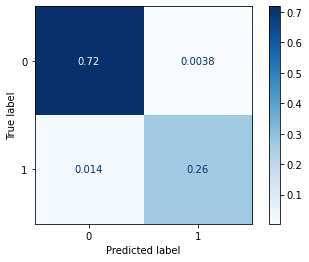

In [ ]:
model_lr = LogisticRegression(random_state= 42)
model_lr, roc_auc_lr, f1_score_lr = model_func(model_lr, X_train, y_train, X_test, y_test)

## Decision tree classifier

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=4)

Precision: 0.9822
Recall: 0.9970
Accuracy Score: 0.9942
F-1 Score: 0.9896
ROC_AUC = 0.9950
              precision    recall  f1-score   support

           0     0.9989    0.9931    0.9959     11381
           1     0.9822    0.9970    0.9896      4369

    accuracy                         0.9942     15750
   macro avg     0.9905    0.9950    0.9927     15750
weighted avg     0.9942    0.9942    0.9942     15750



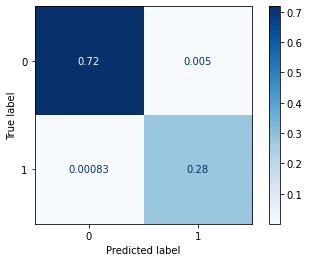

In [ ]:
model_dt, roc_auc_dt, f1_score_dt = model_func(model_dt, X_train, y_train, X_test, y_test)

## Random forest classifier

In [ ]:
model_rf = RandomForestClassifier(random_state=42)

Precision: 0.9824
Recall: 0.9968
Accuracy Score: 0.9942
F-1 Score: 0.9895
ROC_AUC = 0.9950
              precision    recall  f1-score   support

           0     0.9988    0.9931    0.9959     11381
           1     0.9824    0.9968    0.9895      4369

    accuracy                         0.9942     15750
   macro avg     0.9906    0.9950    0.9927     15750
weighted avg     0.9942    0.9942    0.9942     15750



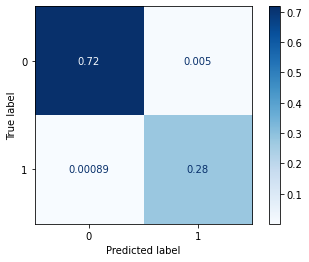

In [ ]:
model_rf, roc_auc_rf, f1_score_rf = model_func(model_rf, X_train, y_train, X_test, y_test)

## Gradient boosting classifiers

In [ ]:
from xgboost import XGBClassifier

Precision: 0.9824
Recall: 0.9968
Accuracy Score: 0.9942
F-1 Score: 0.9895
ROC_AUC = 0.9950
              precision    recall  f1-score   support

           0     0.9988    0.9931    0.9959     11381
           1     0.9824    0.9968    0.9895      4369

    accuracy                         0.9942     15750
   macro avg     0.9906    0.9950    0.9927     15750
weighted avg     0.9942    0.9942    0.9942     15750



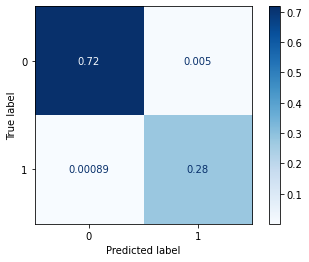

In [ ]:
model_xgbc = XGBClassifier()
model_xgbc, roc_auc_xgbc, f1_score_xgbc = model_func(model_xgbc, X_train, y_train, X_test, y_test)

## SMOTE techniques

In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter
from imblearn.combine import SMOTETomek, SMOTEENN

## ADASYN

In [ ]:
Counter(y_train)

Counter({0: 64515, 1: 24735})

In [ ]:
ada = ADASYN(random_state=42)

In [ ]:
#X_data_ada, y_data_ada = ada.fit_resample(X_data, y_data)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

In [ ]:
counts = Counter(y_train_ada)

In [ ]:
print('After resampling: ', counts)

After resampling:  Counter({1: 64910, 0: 64515})


## SMOTETomek

In [ ]:
smotet = SMOTETomek(random_state=42)
X_train_smotet, y_train_smotet = smotet.fit_resample(X_train, y_train)

In [ ]:
counts2 = Counter(y_train_smotet)

In [ ]:
print('After resampling: ', counts2)

After resampling:  Counter({0: 64352, 1: 64352})


## SMOTEENN

In [ ]:
smenn = SMOTEENN(random_state=42)
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

In [ ]:
counts3 = Counter(y_train_smenn)

In [ ]:
print('After resampling: ', counts3)

After resampling:  Counter({0: 63585, 1: 63165})


## Logistic regression with resampled data

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_data_ada, y_data_ada, test_size = 0.2, random_state = 42)

Precision: 0.9825
Recall: 0.9872
Accuracy Score: 0.9916
F-1 Score: 0.9848
ROC_AUC = 0.9902
              precision    recall  f1-score   support

           0     0.9951    0.9932    0.9942     11381
           1     0.9825    0.9872    0.9848      4369

    accuracy                         0.9916     15750
   macro avg     0.9888    0.9902    0.9895     15750
weighted avg     0.9916    0.9916    0.9916     15750



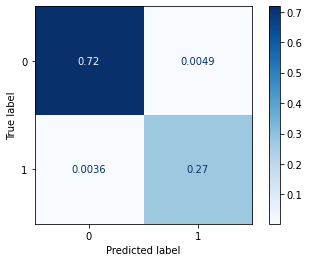

In [ ]:
model_lr_ada = LogisticRegression(random_state= 42)
model_lr_ada, roc_auc_lr_ada, f1_score_lr_ada = model_func(model_lr_ada, X_train_ada, y_train_ada, X_test, y_test)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_data_smotet, y_data_smotet, test_size = 0.2, random_state = 42)

Precision: 0.9836
Recall: 0.9771
Accuracy Score: 0.9891
F-1 Score: 0.9804
ROC_AUC = 0.9854
              precision    recall  f1-score   support

           0     0.9912    0.9938    0.9925     11381
           1     0.9836    0.9771    0.9804      4369

    accuracy                         0.9891     15750
   macro avg     0.9874    0.9854    0.9864     15750
weighted avg     0.9891    0.9891    0.9891     15750



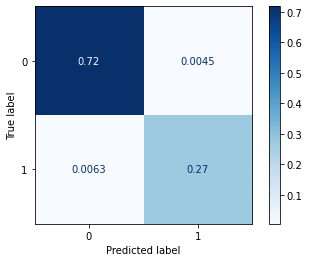

In [ ]:
model_lr_smotet = LogisticRegression(random_state= 42)
model_lr_smotet, roc_auc_lr_smotet, f1_score_lr_smotet = model_func(model_lr_smotet, X_train_smotet, y_train_smotet, X_test, y_test)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_data_smenn, y_data_smenn, test_size = 0.2, random_state = 42)

Precision: 0.9825
Recall: 0.9897
Accuracy Score: 0.9923
F-1 Score: 0.9861
ROC_AUC = 0.9915
              precision    recall  f1-score   support

           0     0.9960    0.9932    0.9946     11381
           1     0.9825    0.9897    0.9861      4369

    accuracy                         0.9923     15750
   macro avg     0.9893    0.9915    0.9904     15750
weighted avg     0.9923    0.9923    0.9923     15750



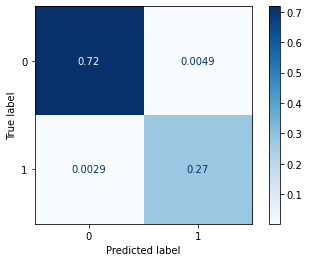

In [ ]:
model_lr_smenn = LogisticRegression(random_state= 42)
model_lr_smenn, roc_auc_lr_smenn, f1_score_lr_smenn = model_func(model_lr_smenn, X_train_smenn, y_train_smenn, X_test, y_test)

## Decision tree classifier with resampled data

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_data_ada, y_data_ada, test_size = 0.2, random_state = 42)

Precision: 0.9785
Recall: 0.9979
Accuracy Score: 0.9933
F-1 Score: 0.9881
ROC_AUC = 0.9948
              precision    recall  f1-score   support

           0     0.9992    0.9916    0.9954     11381
           1     0.9785    0.9979    0.9881      4369

    accuracy                         0.9933     15750
   macro avg     0.9888    0.9948    0.9917     15750
weighted avg     0.9934    0.9933    0.9934     15750



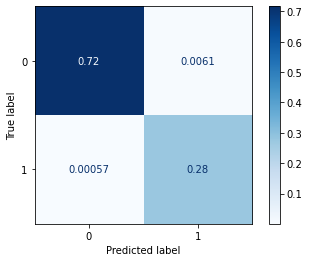

In [ ]:
model_dt_ada = DecisionTreeClassifier(max_depth=4)
model_dt_ada, roc_auc_dt_ada, f1_score_dt_ada = model_func(model_dt_ada, X_train_ada, y_train_ada, X_test, y_test)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_data_smotet, y_data_smotet, test_size = 0.2, random_state = 42)

Precision: 0.9824
Recall: 0.9970
Accuracy Score: 0.9942
F-1 Score: 0.9897
ROC_AUC = 0.9951
              precision    recall  f1-score   support

           0     0.9989    0.9931    0.9960     11381
           1     0.9824    0.9970    0.9897      4369

    accuracy                         0.9942     15750
   macro avg     0.9906    0.9951    0.9928     15750
weighted avg     0.9943    0.9942    0.9942     15750



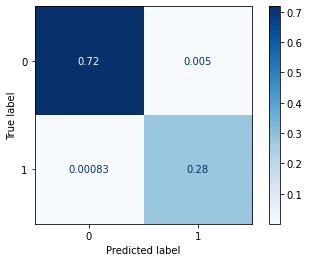

In [ ]:
model_dt_smotet = DecisionTreeClassifier(max_depth=4)
model_dt_smotet, roc_auc_dt_smotet, f1_score_dt_smotet = model_func(model_dt_smotet, X_train_smotet, y_train_smotet, X_test, y_test)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_data_smenn, y_data_smenn, test_size = 0.2, random_state = 42)

Precision: 0.9826
Recall: 0.9957
Accuracy Score: 0.9939
F-1 Score: 0.9891
ROC_AUC = 0.9944
              precision    recall  f1-score   support

           0     0.9983    0.9932    0.9958     11381
           1     0.9826    0.9957    0.9891      4369

    accuracy                         0.9939     15750
   macro avg     0.9905    0.9944    0.9924     15750
weighted avg     0.9940    0.9939    0.9939     15750



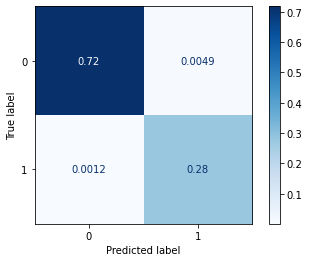

In [ ]:
model_dt_smenn = DecisionTreeClassifier(max_depth=4)
model_dt_smenn, roc_auc_dt_smenn, f1_score_dt_smenn = model_func(model_dt_smenn, X_train_smenn, y_train_smenn, X_test, y_test)

## Random forest classifier with resampled data

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_data_ada, y_data_ada, test_size = 0.2, random_state = 42)

Precision: 0.9824
Recall: 0.9977
Accuracy Score: 0.9944
F-1 Score: 0.9900
ROC_AUC = 0.9954
              precision    recall  f1-score   support

           0     0.9991    0.9931    0.9961     11381
           1     0.9824    0.9977    0.9900      4369

    accuracy                         0.9944     15750
   macro avg     0.9908    0.9954    0.9931     15750
weighted avg     0.9945    0.9944    0.9944     15750



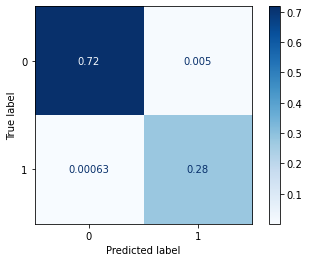

In [ ]:
model_rf_ada = RandomForestClassifier(random_state=42)
model_rf_ada, roc_auc_rf_ada, f1_score_rf_ada = model_func(model_rf_ada, X_train_ada, y_train_ada, X_test, y_test)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_data_smotet, y_data_smotet, test_size = 0.2, random_state = 42)

Precision: 0.9824
Recall: 0.9968
Accuracy Score: 0.9942
F-1 Score: 0.9895
ROC_AUC = 0.9950
              precision    recall  f1-score   support

           0     0.9988    0.9931    0.9959     11381
           1     0.9824    0.9968    0.9895      4369

    accuracy                         0.9942     15750
   macro avg     0.9906    0.9950    0.9927     15750
weighted avg     0.9942    0.9942    0.9942     15750



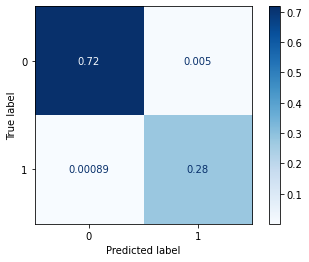

In [ ]:
model_rf_smotet = RandomForestClassifier(random_state=42)
model_rf_smotet, roc_auc_rf_smotet, f1_score_rf_smotet = model_func(model_rf_smotet, X_train_smotet, y_train_smotet, X_test, y_test)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_data_smenn, y_data_smenn, test_size = 0.2, random_state = 42)

Precision: 0.9826
Recall: 0.9947
Accuracy Score: 0.9937
F-1 Score: 0.9886
ROC_AUC = 0.9940
              precision    recall  f1-score   support

           0     0.9980    0.9932    0.9956     11381
           1     0.9826    0.9947    0.9886      4369

    accuracy                         0.9937     15750
   macro avg     0.9903    0.9940    0.9921     15750
weighted avg     0.9937    0.9937    0.9937     15750



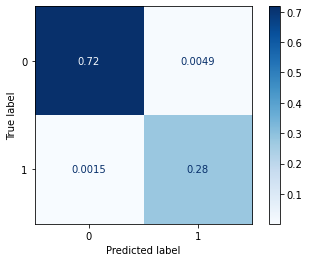

In [ ]:
model_rf_smenn = RandomForestClassifier(random_state=42)
model_rf_smenn, roc_auc_rf_smenn, f1_score_rf_smenn = model_func(model_rf_smenn, X_train_smenn, y_train_smenn, X_test, y_test)

## Gradient boosting classifier with resampled data

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_data_ada, y_data_ada, test_size = 0.2, random_state = 42)

Precision: 0.9807
Recall: 0.9979
Accuracy Score: 0.9940
F-1 Score: 0.9892
ROC_AUC = 0.9952
              precision    recall  f1-score   support

           0     0.9992    0.9924    0.9958     11381
           1     0.9807    0.9979    0.9892      4369

    accuracy                         0.9940     15750
   macro avg     0.9899    0.9952    0.9925     15750
weighted avg     0.9941    0.9940    0.9940     15750



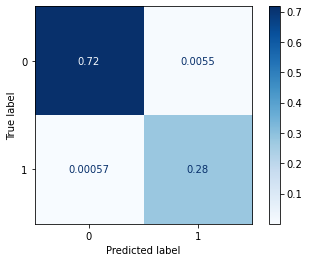

In [ ]:
model_xgbc_ada = XGBClassifier()
model_xgbc_ada, roc_auc_xgbc_ada, f1_score_xgbc_ada = model_func(model_xgbc_ada, X_train_ada, y_train_ada, X_test, y_test)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_data_smotet, y_data_smotet, test_size = 0.2, random_state = 42)

Precision: 0.9824
Recall: 0.9973
Accuracy Score: 0.9943
F-1 Score: 0.9898
ROC_AUC = 0.9952
              precision    recall  f1-score   support

           0     0.9989    0.9931    0.9960     11381
           1     0.9824    0.9973    0.9898      4369

    accuracy                         0.9943     15750
   macro avg     0.9907    0.9952    0.9929     15750
weighted avg     0.9944    0.9943    0.9943     15750



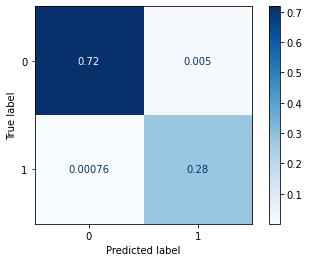

In [ ]:
model_xgbc_smotet = XGBClassifier()
model_xgbc_smotet, roc_auc_xgbc_smotet, f1_score_xgbc_smotet = model_func(model_xgbc_smotet, X_train_smotet, y_train_smotet, X_test, y_test)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_data_smenn, y_data_smenn, test_size = 0.2, random_state = 42)

Precision: 0.9826
Recall: 0.9938
Accuracy Score: 0.9934
F-1 Score: 0.9882
ROC_AUC = 0.9935
              precision    recall  f1-score   support

           0     0.9976    0.9932    0.9954     11381
           1     0.9826    0.9938    0.9882      4369

    accuracy                         0.9934     15750
   macro avg     0.9901    0.9935    0.9918     15750
weighted avg     0.9934    0.9934    0.9934     15750



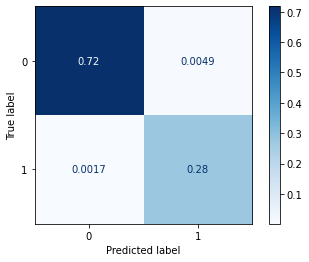

In [ ]:
model_xgbc_smenn = XGBClassifier()
model_xgbc_smenn, roc_auc_xgbc_smenn, f1_score_xgbc_smenn = model_func(model_xgbc_smenn, X_train_smenn, y_train_smenn, X_test, y_test)

# Best model

In [ ]:
df_test_cpy = df_test.copy()
df_test_cpy_id = df_test.copy()

test_id = df_test_cpy.pop('ID')

In [ ]:
prediction = model_xgbc_smenn.predict(df_test)
df_test_cpy['Default'] = prediction
sample = df_test_cpy[['ID', 'Default']]
sample.to_csv("loan_default_pred_xg.csv")

In [ ]:
pwd

'/content'

In [ ]:
df_test_cpy = df_test_cpy.drop('Default',axis=1)
prediction2 = model_dt_smenn.predict(df_test)
df_test_cpy['Default'] = prediction2
sample = df_test_cpy[['ID', 'Default']]
sample.to_csv("loan_default_pred_dt.csv")

In [ ]:
#df_test_cpy = df_test.copy()
#df_test_cpy = df_test_cpy.drop('Default',axis=1)
prediction2 = model_rf_ada.predict(df_test_cpy)
df_test_cpy_id['Default'] = prediction2
sample = df_test_cpy_id[['ID', 'Default']]
sample.to_csv("loan_default_pred_rf.csv")

## Neural network model

In [ ]:
# Split the features into Training Dataset, Validation Dataset, Test Dataset.

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.15, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(61891, 24)
(61891,)
(10923, 24)
(10923,)


In [ ]:
ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)

In [ ]:
print(X_ada.shape)
print(y_ada.shape)

(88831, 24)
(88831,)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
mm = MinMaxScaler()
X_train_scaled = mm.fit_transform(X_ada)
X_test_scaled = mm.transform(X_test)

In [ ]:
(X_train_scaled.shape[1],)

(24,)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,0.000341,0.0,0.007445,0.0,0.194128,0.000000,0.019608,0.150031,0.0,...,0.191781,0.000000,0.082382,0.0,0.0,0.0,1.0,0.353535,0.181818,0.733333
1,0.0,0.000227,0.0,0.001556,0.0,1.000000,0.000000,0.223942,0.536000,0.0,...,0.191781,0.000000,1.000000,1.0,0.0,0.0,1.0,0.353535,0.454545,0.266667
2,1.0,0.000114,0.0,0.003889,0.0,0.231875,0.000000,0.036120,0.536000,0.0,...,0.136986,0.000000,0.075422,0.0,1.0,0.0,0.0,0.343434,0.818182,0.733333
3,0.0,0.000114,0.0,0.002667,0.0,0.545956,0.008213,0.079463,0.754708,0.0,...,0.070015,0.000011,0.429484,1.0,0.0,0.0,1.0,0.313131,0.727273,0.966667
4,1.0,0.000227,0.0,0.001722,0.0,1.000000,0.002243,0.043344,0.136738,0.0,...,0.059361,0.000011,1.000000,0.0,0.0,0.0,1.0,0.333333,0.363636,0.500000


In [ ]:
tf.random.set_seed(13)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D,InputLayer
from tensorflow.keras.callbacks import TensorBoard,ReduceLROnPlateau,EarlyStopping
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [ ]:
input_shape=(X_train_scaled.shape[1],)

model = tf.keras.Sequential(
      [Dense(128, activation="relu",input_shape = input_shape),
       Dropout(0.2),
       Dense(64, activation="relu"),
       Dropout(0.2),
       Dense(32, activation="relu"),
       Dropout(0.2),
       Dense(1, activation="sigmoid"),
      ]
  )
model.summary()
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=2, min_lr=0.0005)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_ada,
        epochs=60,
        validation_data=(X_test_scaled, y_test),
        callbacks=[reduce_lr],
        shuffle=True
         )
score = model.evaluate(X_test_scaled, y_test)
print('loss={}, acc={}'.format(score[0],score[1]))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               3200      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
X_test_main = df_test
X_test_main_scaled = mm.transform(X_test_main)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,accuracy,val_loss,val_accuracy,lr,epoch
35,0.043471,0.986795,0.050111,0.987000,0.0005,35
36,0.042288,0.987189,0.044411,0.989563,0.0005,36
37,0.043226,0.986435,0.044147,0.990662,0.0005,37
38,0.042809,0.987020,0.046809,0.988739,0.0005,38
39,0.042089,0.987122,0.043368,0.990845,0.0005,39
40,0.042276,0.987414,0.049668,0.987641,0.0005,40
41,0.041708,0.987223,0.042430,0.991394,0.0005,41
42,0.041736,0.987516,0.044309,0.991028,0.0005,42
43,0.040897,0.987673,0.047169,0.989289,0.0005,43
44,0.040893,0.987808,0.042152,0.991486,0.0005,44


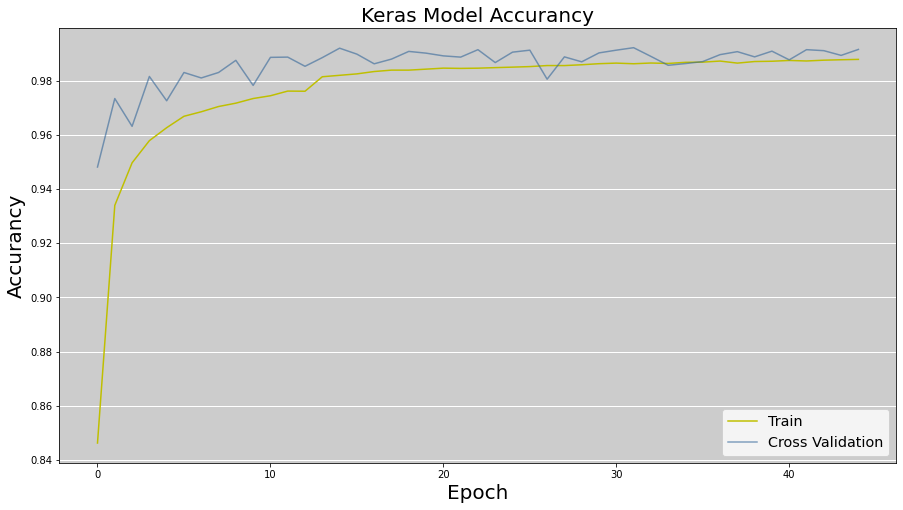

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'], color='y')
plt.plot(history.history['val_accuracy'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model Accurancy',size=20)
plt.ylabel('Accurancy',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='lower right')
plt.show()


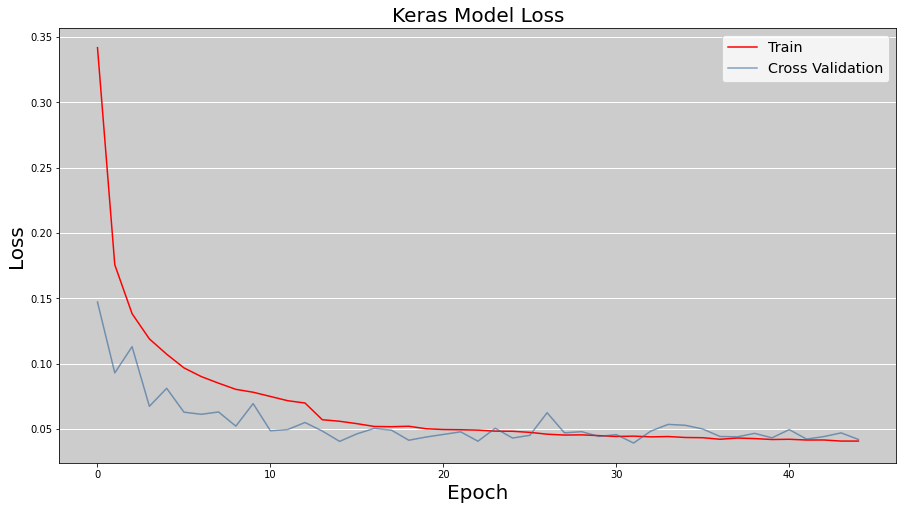

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model Loss',size=20)
plt.ylabel('Loss',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='upper right')
plt.show()

In [ ]:
X_test_main_scaled.shape

(45000, 24)

In [ ]:
X_test_scaled_df = pd.DataFrame(X_test_scaled)

In [ ]:
X_test_main_scaled_df = pd.DataFrame(X_test_main_scaled)

In [ ]:
X_test_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.000682,0.000000,0.005445,0.0,1.000000,0.0,1.000000,0.939569,0.0,...,0.191781,0.000011,1.000000,1.0,0.0,0.0,1.0,0.323232,0.363636,0.866667
1,0.0,0.000000,0.000000,0.032192,0.0,0.224685,0.0,0.044376,0.754708,0.0,...,0.136986,0.378808,0.036513,0.0,0.0,1.0,0.0,0.171717,0.545455,0.600000
2,0.0,0.000682,0.000227,0.012890,0.0,0.480527,0.0,0.046440,0.470031,0.0,...,0.054795,0.000000,0.011753,1.0,0.0,0.0,1.0,0.373737,0.818182,0.833333
3,0.0,0.000000,0.000000,0.058229,0.0,0.375674,0.0,0.034056,0.485908,0.0,...,0.684932,0.000011,0.049977,0.0,0.0,1.0,0.0,0.262626,0.545455,0.866667
4,1.0,0.000568,0.000000,0.003134,0.0,0.651049,0.0,0.051600,1.000000,0.0,...,0.191781,0.000000,0.382131,1.0,0.0,0.0,1.0,0.353535,0.363636,0.766667


In [ ]:
X_test_main_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.002159,0.000000,0.011001,0.0,0.560336,0.049525,0.028896,0.133415,0.0,...,0.086758,0.000000,0.533775,1.0,0.0,0.0,1.0,0.343434,0.181818,0.266667
1,0.0,0.000000,0.000000,0.003889,1.0,0.453685,0.000000,0.029928,0.472862,0.0,...,0.136986,0.000011,0.020424,0.0,0.0,1.0,0.0,0.222222,1.000000,0.433333
2,0.0,0.000795,0.000568,0.002111,0.0,0.310965,0.010000,0.003096,0.276431,0.0,...,0.123288,0.000011,0.368325,1.0,0.0,0.0,1.0,0.343434,0.636364,0.800000
3,1.0,0.000227,0.000000,0.005445,0.0,0.790054,0.000000,0.016512,0.154462,0.0,...,0.027397,0.000011,0.044386,1.0,0.0,0.0,1.0,0.282828,0.454545,0.900000
4,0.0,0.000000,0.000000,0.064063,0.0,0.790054,0.000000,0.004128,0.154462,0.0,...,0.333333,0.000011,0.008101,0.0,1.0,0.0,0.0,0.333333,0.363636,0.033333


In [ ]:
X_test_scaled.shape

(10923, 24)

342/342 [==============================] - 0s 879us/step


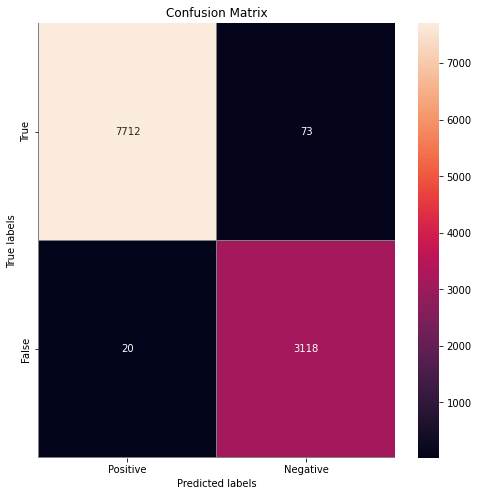

In [ ]:
# Plot a heatmap in order to see the correct and wrong classifications.
fig, ax=plt.subplots(figsize=(8,8))
predict_results = model.predict(X_test_scaled)
predict_results = (predict_results >0.5)
cm = confusion_matrix(y_test, predict_results)
sns.heatmap(cm,
            fmt='.0f',
            linewidths=0.1,
            linecolor='gray',
            annot=True,
            ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['True', 'False'])
plt.show()

In [ ]:
preds = model.predict(X_test_main_scaled)

1407/1407 [==============================] - 1s 875us/step


In [ ]:
preds_df = pd.DataFrame(preds)

In [ ]:
preds2 = (model.predict(X_test_main_scaled) > 0.5).astype("int32")

1407/1407 [==============================] - 1s 889us/step


In [ ]:
preds2_df = pd.DataFrame(preds2)

In [ ]:
preds2_df.head()

,0
0,1
1,0
2,1
3,0
4,0


In [ ]:
preds2.shape

(45000, 1)

In [ ]:
df_test_cpy = df_test_cpy.drop('Default',axis=1)
df_test_cpy['Default'] = preds2_df
sample = df_test_cpy[['ID', 'Default']]
sample.to_csv("loan_default_pred_nn.csv")

In [ ]:
preds_df.head()

,0
0,9.994704e-01
1,5.164574e-07
2,9.958088e-01
3,6.938657e-09
4,3.481263e-10


In [ ]:
# Create the Roc curve of the predictions.
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, model.predict(X_test_main_scaled))
print('roc_auc_score for Model: ', roc_auc_score(y_test, model.predict(X_test_main_scaled)))

plt.figure(figsize=(12,8))
plt.title("Model's - Roc")
plt.plot(false_positive_rate, true_positive_rate, linewidth=4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=0.5)
plt.gca().patch.set_facecolor('0.8')
plt.show()